In [1]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h = Helper()

train_it, validation_it, test_it = h.construct_data_generator_w_validation(batch_size=10,rescale=1./255.)

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


data/train/09019.png


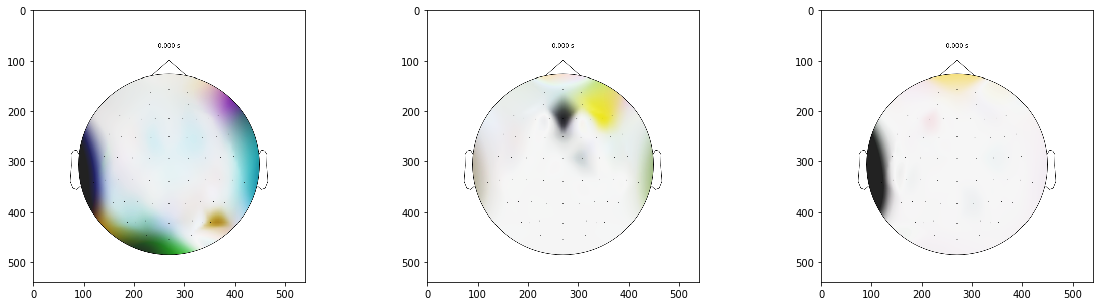

In [3]:
h.plot_examples()

In [4]:
def build_model(optimizer, loss, name):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [5]:
opt = Adam(learning_rate=0.0001)
loss = 'categorical_crossentropy'

In [6]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)

ch = ModelCheckpoint('models/vgg16_ft/cnn_topomap_classification_model_vgg_EDITED.h5', monitor='val_accuracy', 
                     mode='max', save_best_only=True)

In [7]:
model = build_model(opt, loss, 'cnn_topomap_classification_model_vgg_EDITED')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 128)       7

In [8]:
r = model.fit_generator(train_it, epochs=100, callbacks=[tb_log, ch], validation_data=validation_it)

Epoch 1/100
2205/2205 [==============================] - 395s 179ms/step - loss: 1.0989 - accuracy: 0.3382 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/100
2205/2205 [==============================] - 395s 179ms/step - loss: 1.0988 - accuracy: 0.3342 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/100
2205/2205 [==============================] - 396s 180ms/step - loss: 1.0989 - accuracy: 0.3329 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/100
 977/2205 [============>.................] - ETA: 3:11 - loss: 1.0987 - accuracy: 0.3361

KeyboardInterrupt: 

In [ ]:
evaluate = model.evaluate_generator(test_it)

In [ ]:
y_prob = model.predict_generator(test_it)

In [ ]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_vgg_EDITED')

In [ ]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_vgg_EDITED')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_vgg_EDITED.png')

In [ ]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_vgg_EDITED')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_vgg_EDITED.png')